In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 준비

In [11]:
# y = wx + b

n = 100
x = np.arange(n).reshape(-1,1)

x.shape
# 10행 1열

(100, 1)

In [12]:
# w=4, b=7

y = 4*x + 7
y.shape

(100, 1)

# 훈련용 데이터와 테스트용 데이터8:2 분할

In [19]:
n = 100
x = np.arange(n).reshape(-1,1)

x.shape

np.random.seed(14)
randValue = np.random.random(n)*35
randValue = randValue.reshape(-1,1)

y = 4*x + 7 + randValue
y.shape

(100, 1)

In [15]:
print(x_train)

[[34]
 [64]
 [38]
 [20]
 [50]
 [99]
 [ 7]
 [74]
 [54]
 [42]
 [23]
 [79]
 [58]
 [53]
 [47]
 [98]
 [33]
 [51]
 [36]
 [60]
 [62]
 [92]
 [16]
 [89]
 [48]
 [72]
 [49]
 [95]
 [14]
 [46]
 [66]
 [ 3]
 [56]
 [21]
 [93]
 [15]
 [96]
 [81]
 [75]
 [13]
 [11]
 [57]
 [78]
 [19]
 [30]
 [76]
 [84]
 [63]
 [ 1]
 [43]
 [27]
 [59]
 [ 9]
 [31]
 [83]
 [17]
 [45]
 [86]
 [68]
 [67]
 [41]
 [37]
 [ 5]
 [ 0]
 [85]
 [94]
 [77]
 [ 4]
 [32]
 [87]
 [25]
 [26]
 [61]
 [80]
 [10]
 [28]
 [71]
 [22]
 [12]
 [88]]


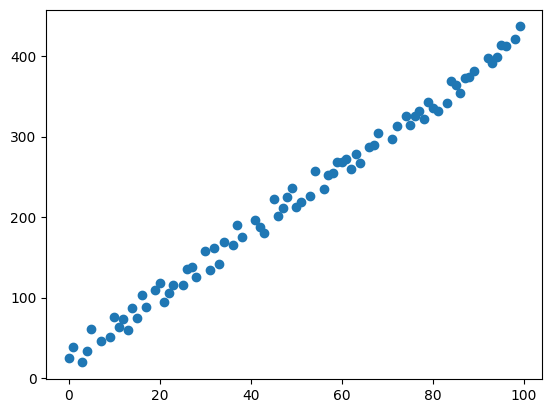

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_train, y_train)
plt.show()

In [20]:
# train 8 : test 2 구분

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80, 1)
(20, 1)


# 모델링

In [22]:
# 모델생성

model = LinearRegression()

In [23]:
# 모델학습
# x, y 훈련데이터를 fit 함수에 입력

model.fit(x_train, y_train)

LinearRegression()

In [25]:
# w와 b 확인
# coef = w, intercept = b


model.coef_, model.intercept_

(array([[3.99647851]]), array([23.79477363]))

In [26]:
# 모델 평가

pred = model.predict([[20], [21]])
pred

array([[103.72434387],
       [107.72082238]])

In [27]:
# 예측

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(x_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))


112.72273058778171
9.431247572533609
10.61709614667691


# 다항 방정식

In [34]:
# y = w1*x1 + w2*x2 + b

# 답찾기
# w1 = 4, w2 = 5, b = 3
# y = 4*x1 + 5*x2 + 3

n = 10
x = np.arange(n).reshape(-1, 1)
x1 = np.arange(n).reshape(-1, 1)

# + noise
np.random.seed(14)
randValue = np.random.random(n)*5
randValue = randValue.reshape(-1,1)

y = 4*x + 5*x1 + 3 + randValue
y

array([[ 5.56971672],
       [15.86582526],
       [25.35213843],
       [30.04023474],
       [40.54867963],
       [52.7880187 ],
       [59.56558356],
       [67.59142212],
       [77.69599969],
       [85.10627471]])

In [36]:
# train 8 : test 2 구분

from sklearn.model_selection import train_test_split

x1_train, x1_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


In [37]:
# 모델

model = LinearRegression()

model.fit(x1, y)

LinearRegression()

In [39]:
# 예측

y_pred = model.predict(x_test)

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))



0.7222413363884553
0.8220995626293486
0.8498478313136154


# 2차원 방정식

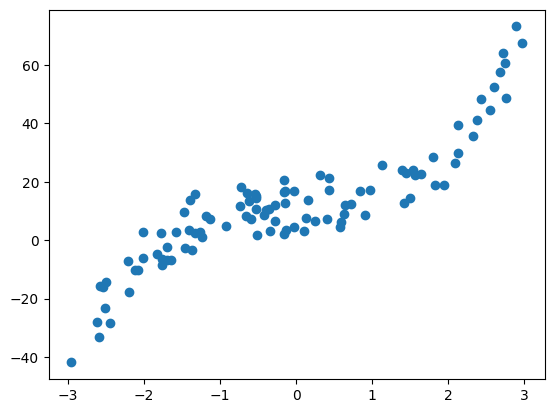

In [44]:
# 수식에 3제곱을 구현하고 모델링하기

n = 100

randNum = np.random.rand(n,1)
x = 6*randNum - 3

np.random.seed(14)
randValue =np.random.random(n)*20
randValue = randValue.reshape(-1,1)

# 정답
y = 2 * x**3 + x + 2 + randValue

# 표 그리기
plt.scatter(x,y)
plt.show()

In [46]:
# 고차 방정식을 만들어주는 함수

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=True)

x_poly = poly_features.fit_transform(x)

# x가 0일때
x[0], x_poly[0]

(array([-1.5782882]),
 array([ 1.        , -1.5782882 ,  2.49099363, -3.93150585]))

In [ ]:
# 위 설명

#         _x가 1일때_  _____x____   ____x**2___  ____x**3___
#  array([ 1.        , -1.5782882 ,  2.49099363, -3.93150585]))

In [47]:
# 모델선언 및 적용

model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [48]:
# 답 찾기

model.coef_, model.intercept_

(array([[0.        , 1.02245995, 0.26343998, 2.03197951]]),
 array([10.87510866]))

In [51]:
# 3차 방정식에넣어줌
# PolynomialFeatures : 다항식 형태를 만들어줌


from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(degree=3, include_bias=True), LinearRegression())
model.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

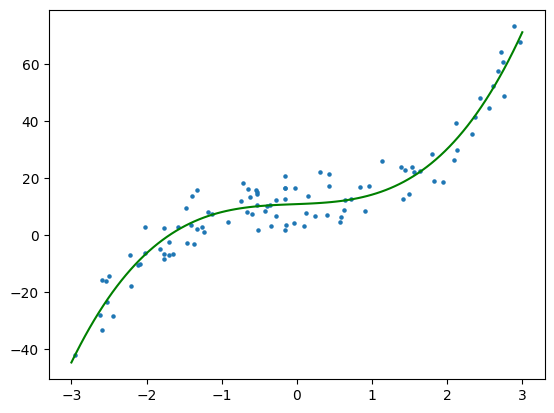

In [64]:
xx = np.linspace(-3, 3, 100)
y_pred = model.predict(xx[:, np.newaxis])

plt.plot(xx, y_pred, 'g') # 예측선
plt.scatter(x,y, s=5) # scatter scale > 5로 지정
plt.show()